<br><font color='darkgreen' size=8><u>Churn Prediction Problem</u></font>
# <font color='navy'>Problem Statement</font>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In this project, we will analyze customer-level data of a leading telecom firm, build machine learning models to identify customers at high risk of churn based on the features provided for their usage.

Here we are going to use the <b>Random Forest Classifier</b> algorithm for higher accuracy and <b>Logistic Regression</b> algorithm for higher business interpretability. Our aim is as follows.

- Determine the predictor variables that affect the churn
- Determine the significance of each variable in the prediction
- Obtain the probabilities for all data points 
- Choose the most important performance metric relevant to this specific business problem
- Choose an appropriate probability threshold to make the final classficiation and improve the above metric

# <font color='navy'>Exploratory Data Analysis</font>

In [1]:
#importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
# reading the data csv and converting it into a dataframe
df=pd.read_csv('train.csv')

# quick peek into the dataframe
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [4]:
df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

There are <b>172 columns</b> in total and some columns are having <b>nulls</b>. So we have to treat them using imputation or dropping methods. There are few object data types. So we have to do appropriate data type conversions. Reading the data dictionary, we see that <font color='red'><b>id</b></font> is basically a unique subscriber id. Since pandas dataframes already have unique 0-based indexing, we can drop this column. Obviously <font color='green'><b>churn_probability</b></font> is the <b>categorical binary class</b> <font color='green'><b>target variable</b></font> which we're trying to predict.

In [5]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [6]:
# printing the list of variables in decreasing order of their null percentage
missing=pd.DataFrame(100*(df.isnull().sum()/df.shape[0]).sort_values(ascending=False), columns=['% of Nulls'])
missing.head(40)

% of Nulls
count_rech_2g_6            74.902499
arpu_2g_6                  74.902499
night_pck_user_6           74.902499
date_of_last_rech_data_6   74.902499
total_rech_data_6          74.902499
av_rech_amt_data_6         74.902499
max_rech_data_6            74.902499
count_rech_3g_6            74.902499
arpu_3g_6                  74.902499
fb_user_6                  74.902499
arpu_3g_7                  74.478207
night_pck_user_7           74.478207
date_of_last_rech_data_7   74.478207
total_rech_data_7          74.478207
max_rech_data_7            74.478207
fb_user_7                  74.478207
av_rech_amt_data_7         74.478207
count_rech_2g_7            74.478207
count_rech_3g_7            74.478207
arpu_2g_7                  74.478207
arpu_2g_8                  73.689624
night_pck_user_8           73.689624
arpu_3g_8                  73.689624
max_rech_data_8            73.689624
av_rech_amt_data_8         73.689624
date_of_last_rech_data_8   73.689624
fb_user_8                  73.689624
count_rech_3g_8            73.689624
total_rech_data_8          73.689624
count_rech_2g_8            73.689624
isd_og_mou_8                5.290076
std_og_t2c_mou_8            5.290076
std_ic_t2f_mou_8            5.290076
std_ic_t2o_mou_8            5.290076
std_og_mou_8                5.290076
std_ic_t2m_mou_8            5.290076
loc_ic_t2f_mou_8            5.290076
std_ic_t2t_mou_8            5.290076
spl_og_mou_8                5.290076
loc_ic_mou_8                5.290076

There are multiple <b>columns</b> whose <b>missing</b> value percentages are way <b>too high</b> (~75%). Hence we have no other option than to <b>drop</b> the column completely. Those <b>columns</b> with relatively <b>low</b> missing values can be imputed with any imputing method.

In [7]:
# list of columns to be dropped
dropping_columns=missing[missing['% of Nulls']>6].index
dropping_columns

Index(['count_rech_2g_6', 'arpu_2g_6', 'night_pck_user_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'av_rech_amt_data_6',
       'max_rech_data_6', 'count_rech_3g_6', 'arpu_3g_6', 'fb_user_6',
       'arpu_3g_7', 'night_pck_user_7', 'date_of_last_rech_data_7',
       'total_rech_data_7', 'max_rech_data_7', 'fb_user_7',
       'av_rech_amt_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_8', 'arpu_3g_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'date_of_last_rech_data_8', 'fb_user_8',
       'count_rech_3g_8', 'total_rech_data_8', 'count_rech_2g_8'],
      dtype='object')

In [8]:
# dropping the above columns
df.drop(dropping_columns, axis=1, inplace=True)

In [9]:
# finding the features having no variation
drop_cols_no_var=(df.std()[df.std()==0]).index
drop_cols_no_var

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [10]:
# dropping the aforementioned variables
df.drop(drop_cols_no_var, axis=1, inplace=True)

In [11]:
# inspecting the object type columns
object_columns=list(df.select_dtypes('object').columns)
object_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [12]:
# lets analyze the above object type columns separately
cols_to_be_deleted=[]
cols_to_be_converted=[]
for _ in range(len(object_columns)):
    cols=object_columns.pop()
    if df[cols].unique().shape[0]<=2:
        print(cols,df[cols].unique())
        cols_to_be_deleted.append(cols)
    else:
        # filtering out columns which actually has many different values
        cols_to_be_converted.append(cols)

last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_6 ['6/30/2014']


In [13]:
# deleting the above columns with no variation
df.drop(cols_to_be_deleted, axis=1, inplace=True)

In [14]:
# converting object type to datetype
for cols in cols_to_be_converted:
    df[cols]=pd.to_datetime(df[cols], format="%m/%d/%Y")

In [15]:
# extracting only the day number out of it
df[cols_to_be_converted]=df[cols_to_be_converted].apply(lambda x: x.dt.day)
df[cols_to_be_converted].head()

date_of_last_rech_8  date_of_last_rech_7  date_of_last_rech_6
0                 24.0                 10.0                 22.0
1                 26.0                 10.0                 12.0
2                 24.0                 22.0                 11.0
3                 25.0                 21.0                 15.0
4                 30.0                 26.0                 25.0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 128 entries, arpu_6 to churn_probability
dtypes: float64(102), int64(26)
memory usage: 68.4 MB


There are no object datatype columns in the whole dataset, all are numbers only

In [17]:
# taking quick look at the statistical summary
df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
mean     283.134365    278.185912    278.858826    133.153275    133.894438   
std      334.213918    344.366927    351.924315    299.963093    311.277193   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      7.410000      6.675000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    119.390000    115.837500   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
mean     132.978257    198.874771    197.153383    196.543577       9.765435   
std      311.896596    316.818355    322.482226    324.089234      57.374429   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.410000     34.860000     32.240000     31.575000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      115.060000    232.990000    227.630000    229.345000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       ...  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7  \
count  ...  69999.000000  69999.000000  69999.000000  69999.000000   
mean   ...      0.077730      0.081958      0.075344      0.081444   
std    ...      0.383189      0.381821      0.573003      0.634547   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     16.000000     16.000000     29.000000     33.000000   

        sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean       0.085487   1220.639709     68.108597     65.935830     60.07674   
std        0.680035    952.426321    269.328659    267.899034    257.22681   
min        0.000000    180.000000      0.000000      0.000000      0.00000   
25%        0.000000    468.000000      0.000000      0.000000      0.00000   
50%        0.000000    868.000000      0.000000      0.000000      0.00000   
75%        0.000000   1813.000000      0.000000      0.000000      0.00000   
max       41.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 128 columns]

In [18]:
# checking for NaNs
print(f"There are still {df.isna().sum().sum()} NaNs in our dataframe which we're going to impute using KNN imputer, but it'll be done in a pipeline")

There are still 252062 NaNs in our dataframe which we're going to impute using KNN imputer, but it'll be done in a pipeline


In [19]:
# checking for duplicates
df.duplicated().sum()

0

There are no duplicated rows

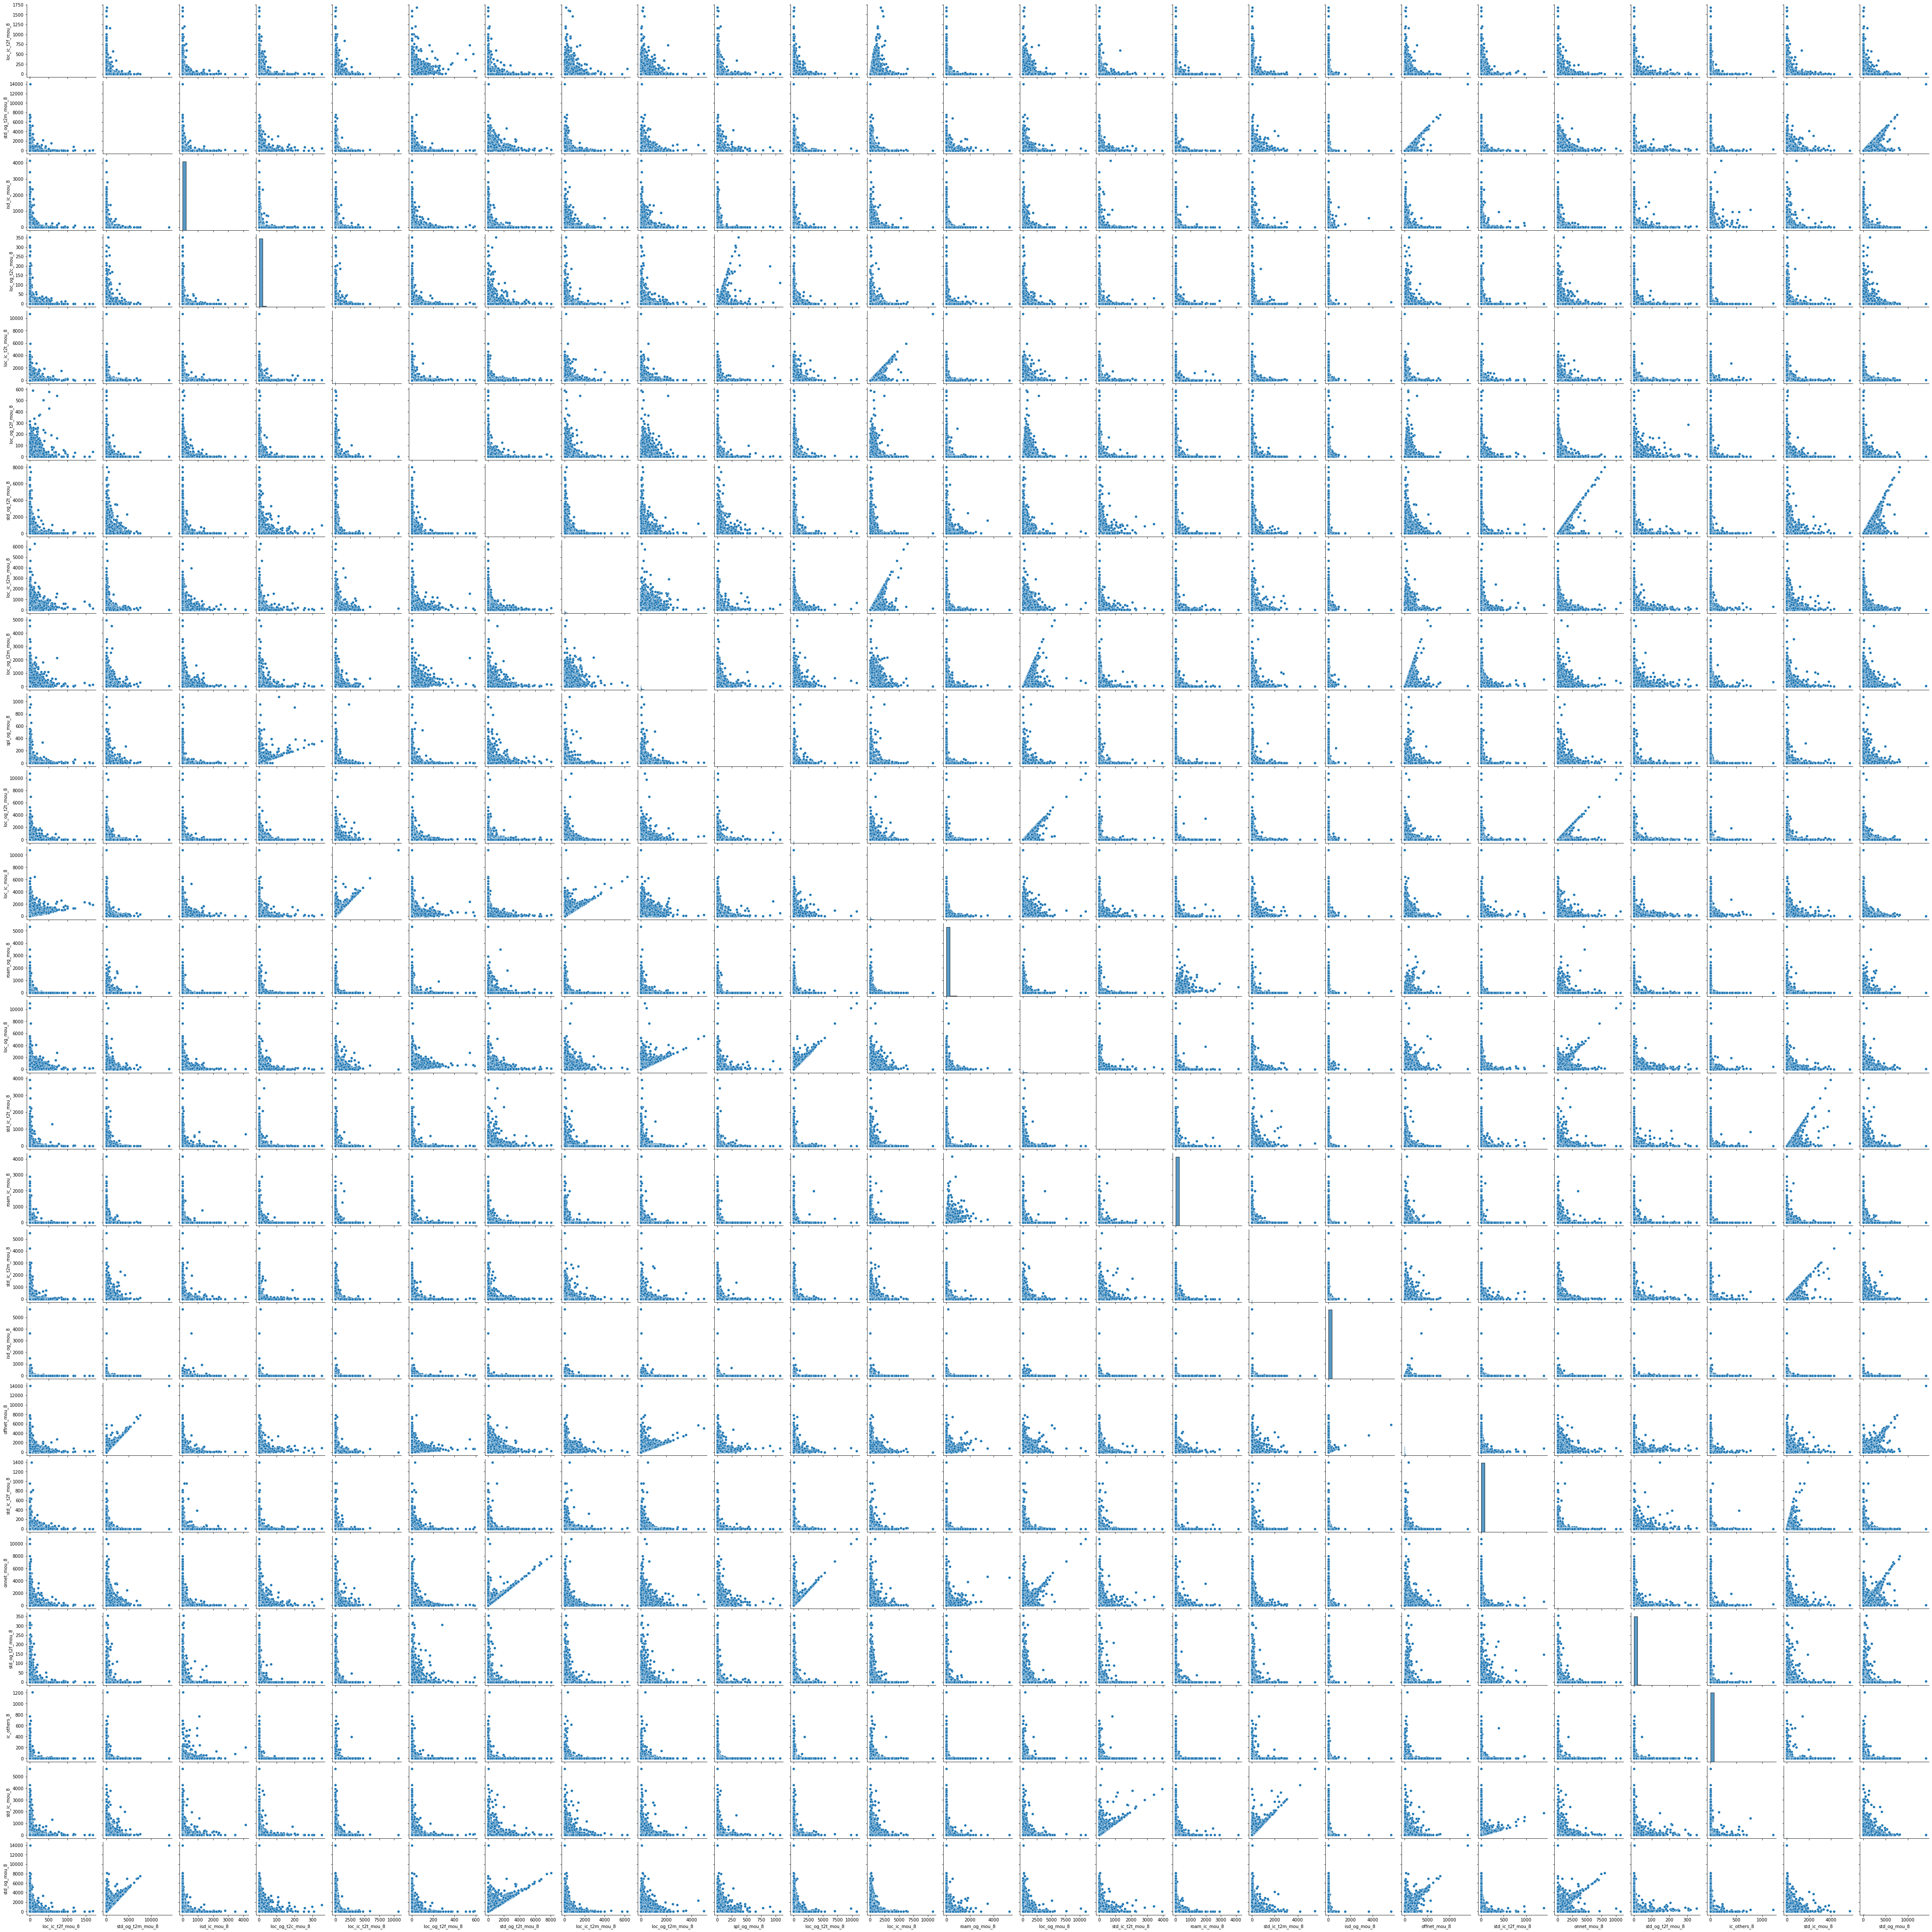

In [301]:
# To visualise Continous Variables and their relationship with SalePrice:
sns.pairplot(df, 
             x_vars=['loc_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'isd_ic_mou_8',
       'loc_og_t2c_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_8',
       'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'spl_og_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'loc_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8',
       'std_ic_t2m_mou_8', 'isd_og_mou_8', 'offnet_mou_8', 'std_ic_t2f_mou_8',
       'onnet_mou_8', 'std_og_t2f_mou_8', 'ic_others_8', 'std_ic_mou_8', 'std_og_mou_8'], 
             y_vars=['loc_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'isd_ic_mou_8',
       'loc_og_t2c_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_8',
       'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'spl_og_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'loc_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8',
       'std_ic_t2m_mou_8', 'isd_og_mou_8', 'offnet_mou_8', 'std_ic_t2f_mou_8',
       'onnet_mou_8', 'std_og_t2f_mou_8', 'ic_others_8', 'std_ic_mou_8', 'std_og_mou_8'])

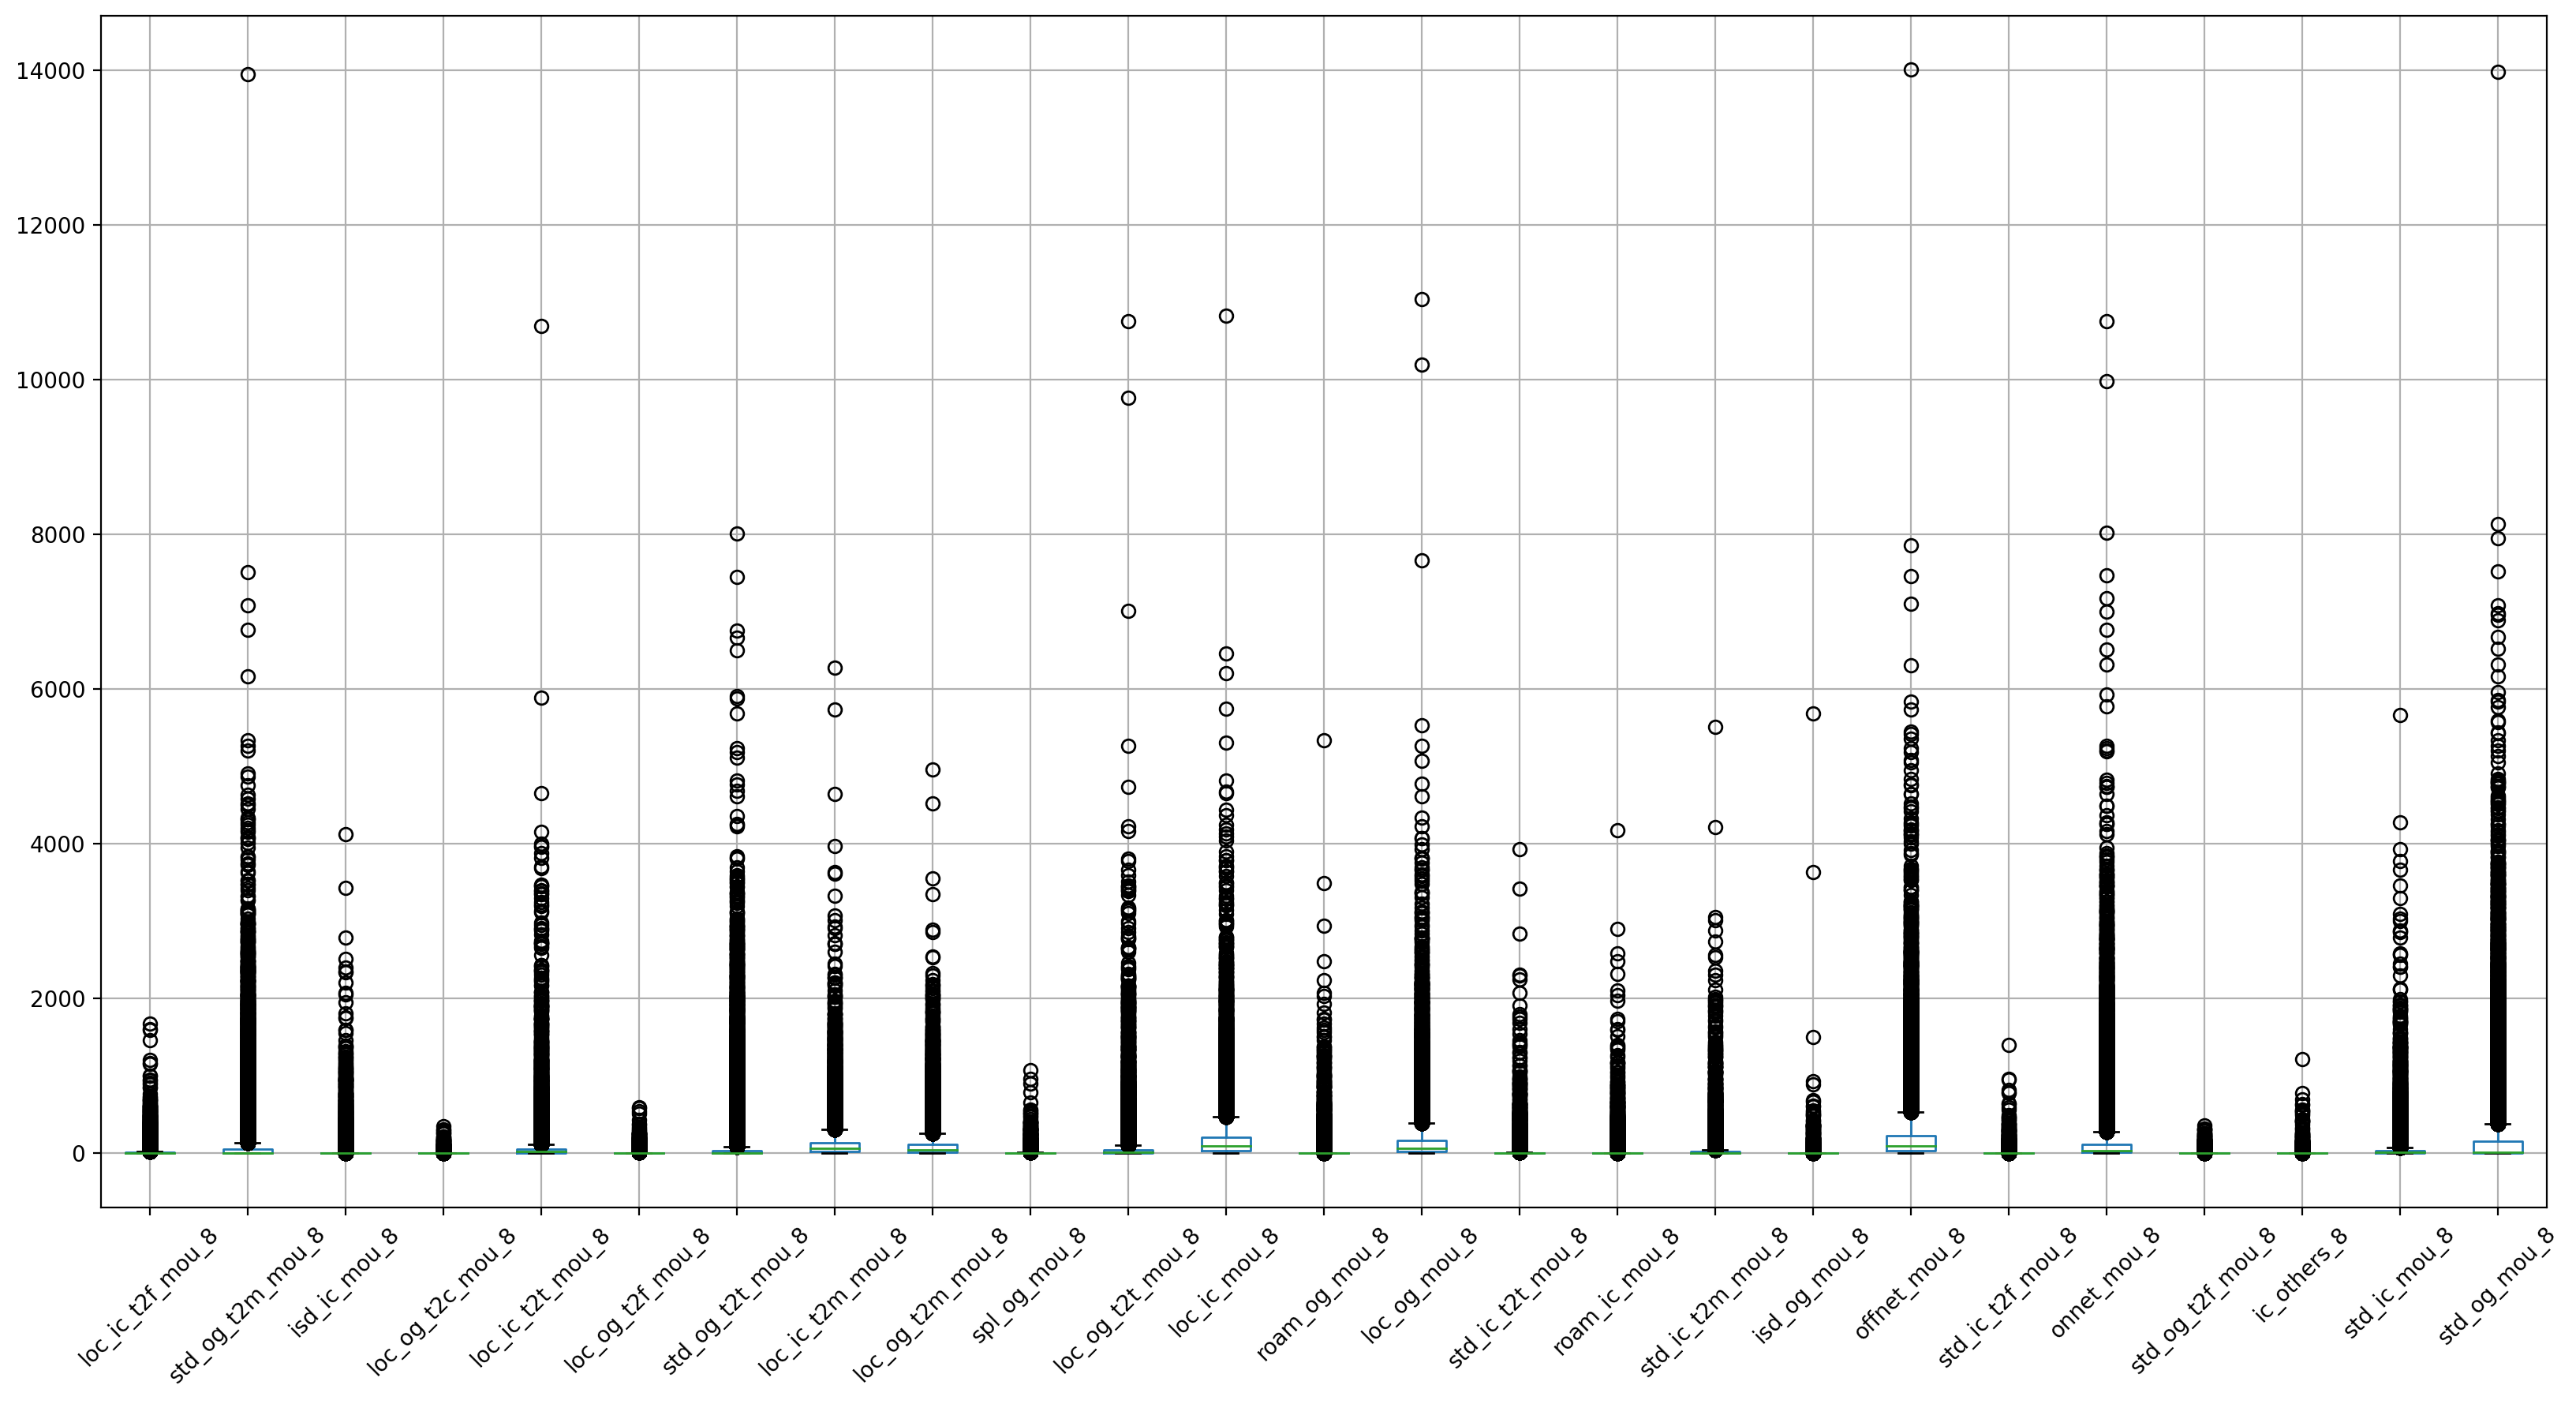

In [307]:
# to determine outliers in continuous varibale columns using box plots:
plt.figure(dpi=200, figsize=(20,10))
df.boxplot(column=['loc_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'isd_ic_mou_8',
       'loc_og_t2c_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_8',
       'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'spl_og_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'loc_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8',
       'std_ic_t2m_mou_8', 'isd_og_mou_8', 'offnet_mou_8', 'std_ic_t2f_mou_8',
       'onnet_mou_8', 'std_og_t2f_mou_8', 'ic_others_8', 'std_ic_mou_8', 'std_og_mou_8'], rot=45);

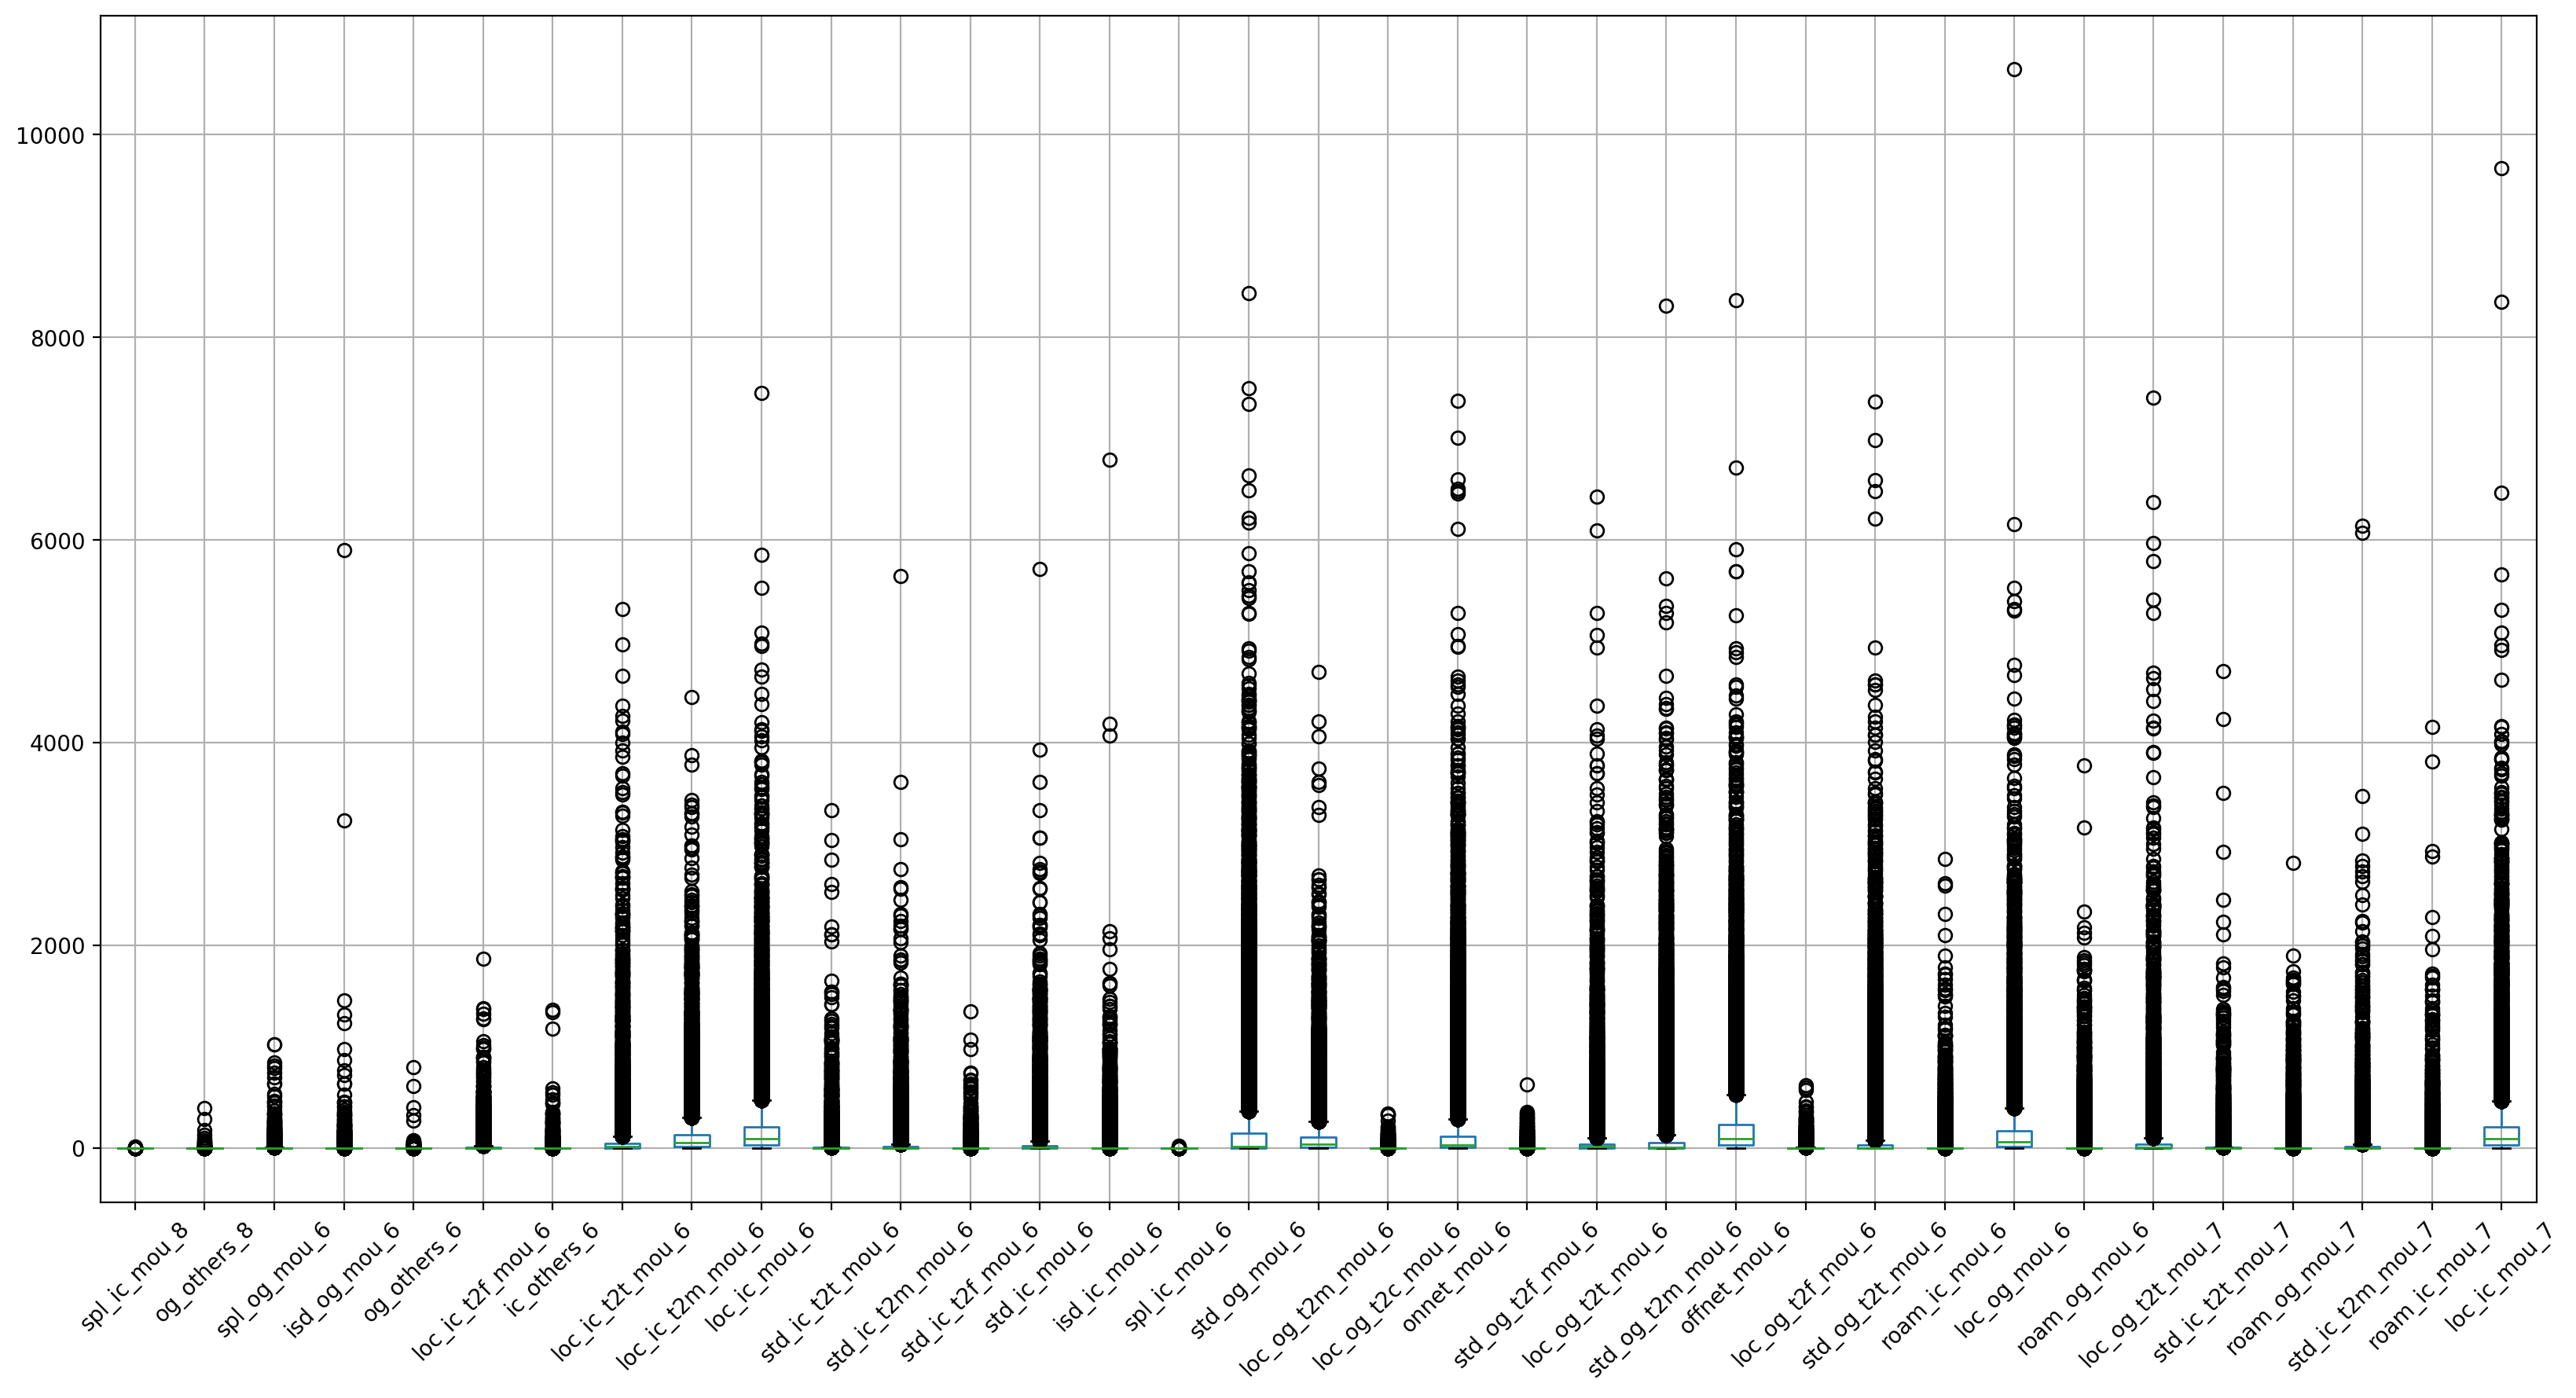

In [309]:
# to determine outliers in continuous varibale columns using box plots:
plt.figure(dpi=200, figsize=(20,10))
df.boxplot(column=['spl_ic_mou_8', 'og_others_8',
       'spl_og_mou_6', 'isd_og_mou_6', 'og_others_6', 'loc_ic_t2f_mou_6',
       'ic_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6',
       'std_og_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'onnet_mou_6', 'std_og_t2f_mou_6',
       'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'offnet_mou_6',
       'loc_og_t2f_mou_6', 'std_og_t2t_mou_6', 'roam_ic_mou_6', 'loc_og_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_7', 'std_ic_t2t_mou_7',
       'roam_og_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'loc_ic_mou_7'], rot=45);

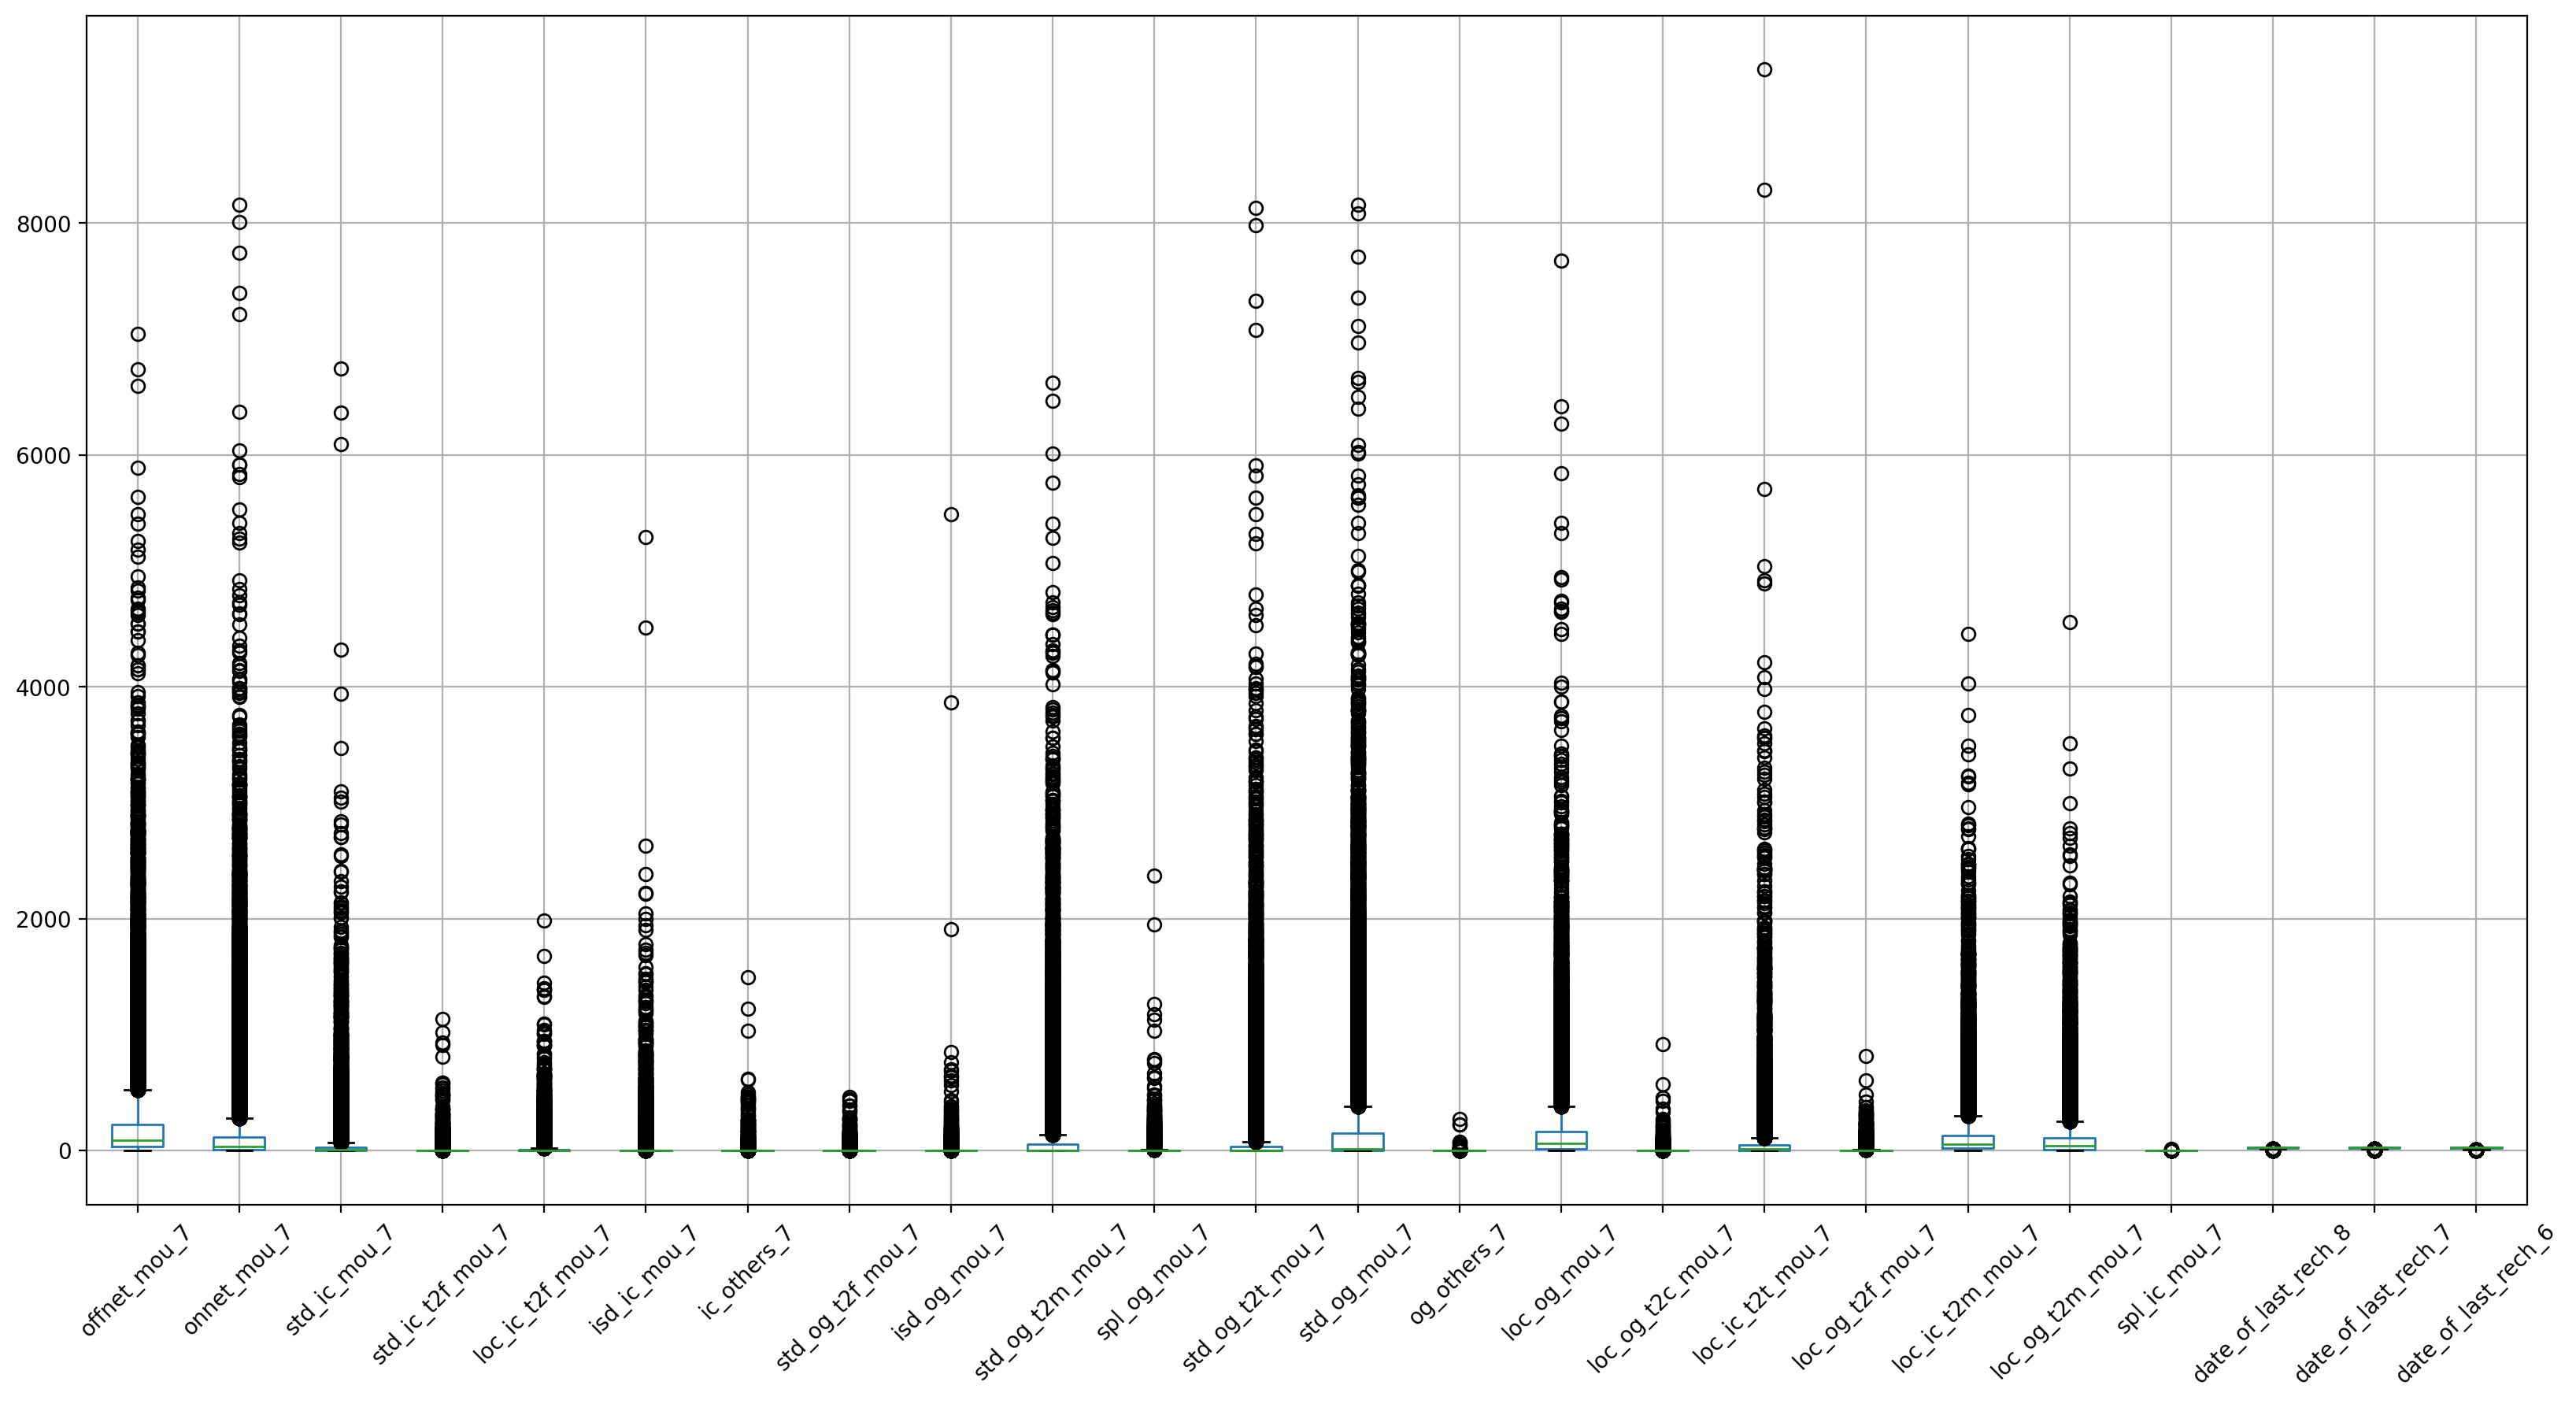

In [310]:
# to determine outliers in continuous varibale columns using box plots:
plt.figure(dpi=200, figsize=(20,10))
df.boxplot(column=['offnet_mou_7', 'onnet_mou_7', 'std_ic_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_t2f_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'std_og_t2f_mou_7', 'isd_og_mou_7',
       'std_og_t2m_mou_7', 'spl_og_mou_7', 'std_og_t2t_mou_7', 'std_og_mou_7',
       'og_others_7', 'loc_og_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2t_mou_7',
       'loc_og_t2f_mou_7', 'loc_ic_t2m_mou_7', 'loc_og_t2m_mou_7',
       'spl_ic_mou_7', 'date_of_last_rech_8', 'date_of_last_rech_7',
       'date_of_last_rech_6'], rot=45);

In [20]:
# checking the class balance
churn_rate=100*(df.churn_probability.sum()/df.shape[0])
print(f'Churn Rate is {round(churn_rate,2)}%')

Churn Rate is 10.19%


Clearly the given dataset is highly imbalanced. So we need to use some balancing technique, here we prefer <b>SMOTE</b>, but it'll be done in a pipeline

# <font color='Navy' size=8>Random Forest Model</font>

<b>Random forest</b> algorithm <font color='grey'>(in fact any tree based algorithm)</font> is <font color='darkviolet'><b>scale invariant</b></font>, so we don't have to subject the data to any type of scaling. <b>Random forest</b> is also immune to the '<font color='darkviolet'><b>curse of dimensionality</b></font>', so we don't have to use any dimensionality reduction technique such as <b>recursive feature elimination</b> or <b>principal component analysis</b>

Lets create the <b>pipeline</b> now, using the <b>imputer</b> object, the <b>learning algorithm</b> and the <b>SMOTE</b> object to balance the dataset and passing it on to the <b>gridsearch</b> object as the estimator

In [21]:
# importing imputer object
from sklearn.impute import SimpleImputer

# importing SMOTE object
from imblearn.over_sampling import SMOTE

# importing randomforest object
from sklearn.ensemble import RandomForestClassifier

# importing stratified kfold cv object
from sklearn.model_selection import StratifiedKFold

# importing pipeline object
from imblearn.pipeline import Pipeline

# importing gridsearchcv object
from sklearn.model_selection import GridSearchCV

# importing train_test_split function
from sklearn.model_selection import train_test_split

In [22]:
# instantiating imputer object
simple=SimpleImputer()

# instantiating SMOTE object
smote=SMOTE(n_jobs=-1)

# instantiating randomforest object
rf=RandomForestClassifier(n_jobs=-1)

# instantiating stratified kfold cv object
stratify=StratifiedKFold(n_splits=5)

# instantiating pipeline object
pipe=Pipeline(steps=[('simple',simple),('smote',smote),('rf',rf)])

In [23]:
# creating a parameter grid
param_grid={'rf__n_estimators':[400,600,800],
            'rf__min_samples_split':[2,10,50]}

# instantiating gridsearchcv object
grid=GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=stratify,
                  scoring='accuracy',
                  n_jobs=-1)

In [24]:
# separating independent and dependent variables
X=df.drop(['churn_probability'], axis=1)
y=df.churn_probability

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# training the algorithm on the data
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('simple', SimpleImputer()),
                                       ('smote', SMOTE(n_jobs=-1)),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__min_samples_split': [2, 10, 50],
                         'rf__n_estimators': [400, 600, 800]},
             scoring='accuracy')

In [46]:
# this is the best estimator
grid.best_params_

{'rf__min_samples_split': 2, 'rf__n_estimators': 800}

The above is the best estimator as per our <b>GridSearchCV</b> which is <font color='darkviolet'><b>RandomForestClassifier</b></font> model with the above specific parameter values

In [49]:
# best accuracy score
grid.best_score_

0.9366952741316188

In [59]:
# predicted values
y_pred=grid.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# this gives the probabilities of data points belonging to 'churn' class
y_test_prob=grid.predict_proba(X_test)[:,1]
y_test_prob

array([0.07375, 0.89375, 0.0525 , ..., 0.04125, 0.0425 , 0.01125])

In [57]:
# classification performance evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12574
           1       0.68      0.69      0.68      1426

    accuracy                           0.93     14000
   macro avg       0.82      0.83      0.82     14000
weighted avg       0.94      0.93      0.94     14000



Even though the overall test <b>accuracy_score</b> is quite good. Both <b>precision_score</b> and <b>recall_score</b> of the positive class are <b>relatively low</b>. Particularly in this problem we care about the recall_score, hence we'll adjust the <b>probability threshold</b> to optimize for <b>recall_score</b>

In [66]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob,drop_intermediate=False)
auc=round(100*roc_auc_score(y_test,y_test_prob),2)
print(f'AUC={auc}')

AUC=93.74


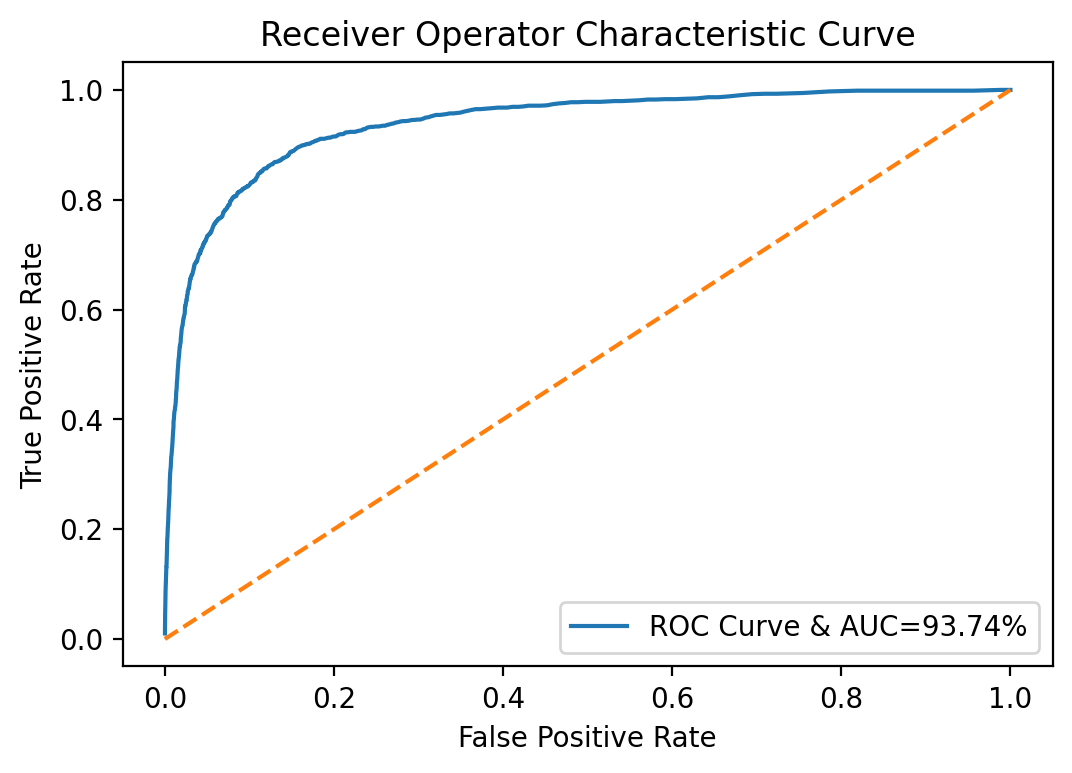

In [75]:
plt.figure(dpi=200)
plt.title('Receiver Operator Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.lineplot(x=fpr,y=tpr, label='ROC Curve & AUC=93.74%')
sns.lineplot(np.linspace(0,1,100),np.linspace(0,1,100), ls='--');

We know that farther the <font color='green'><b>ROC curve</b></font> is from the <b>line y=x</b> the better our model is. In that sense, we have a really good model and the <font color='green'><b>auc_score</b></font> is <b>93.74%</b> which is pretty good.

Let us now plot the graph of <font color='green'><b>accuracy vs threshold</b></font>, <font color='green'><b>sensitivity vs threshold</b></font> and <font color='green'><b>specificity vs threshold</b></font> on the same graph. Let us come up with a short and evenly spaced new array of <font color='green'><b>threshold values</b></font> and compute the above 3 metrics off of them.

In [73]:
# determine the threshold value for which sensitivity=specificity
thresholds[abs(tpr-(1-fpr))<0.0001]

array([0.2175])

In [76]:
# creating 100 probability thresholds using linspace
threshold_list=np.linspace(0,1,100)
# creating lists to contain accuracy, sensitivity and specificity
accuracy_list=[]
sensitivity_list=[]
specificity_list=[]
for i in threshold_list:
    # making predictions for every choice of threshold
    y_tmp=np.array([1 if num>i else 0 for num in y_test_prob])
    # getting the confusion matrix for the above prediction
    conf=confusion_matrix(y_test,y_tmp)
    # finding the other 3 metrics using the confusion matrix
    accuracy_list.append((conf[1,1]+conf[0,0])/(conf[0,0]+conf[0,1]+conf[1,1]+conf[1,0]))
    sensitivity_list.append(conf[1,1]/(conf[1,1]+conf[1,0]))
    specificity_list.append(conf[0,0]/(conf[0,0]+conf[0,1]))

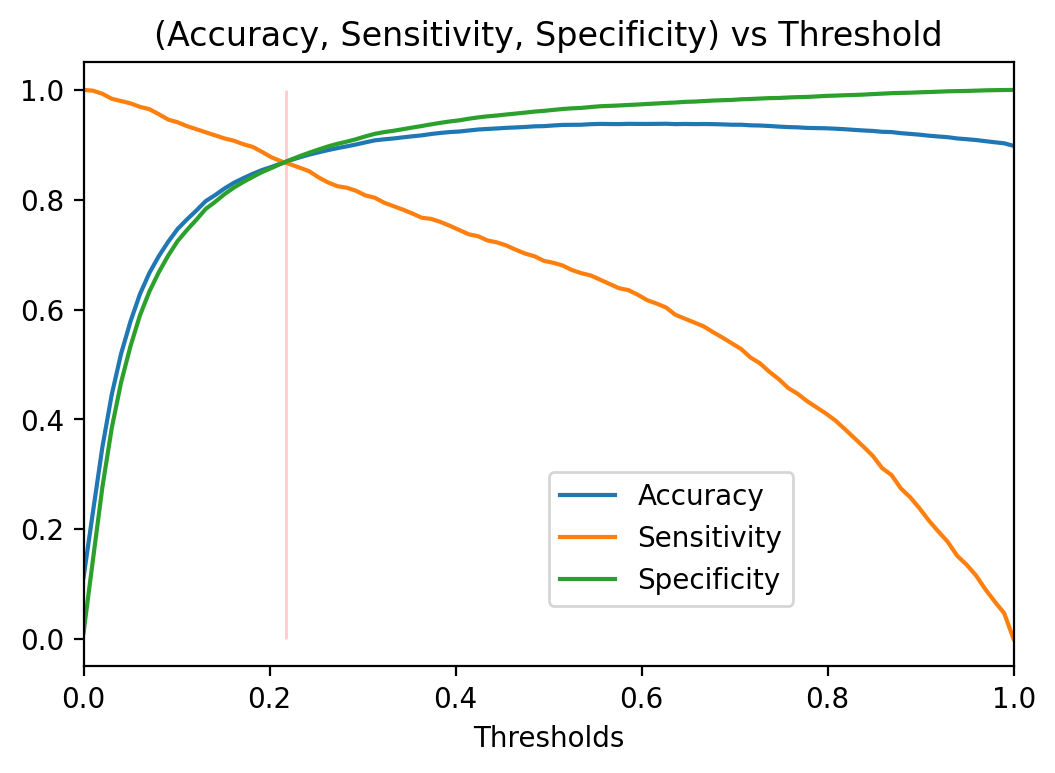

In [133]:
# plotting the curves using the metrics we've computed
plt.figure(dpi=200)
plt.title('(Accuracy, Sensitivity, Specificity) vs Threshold')
plt.xlabel('Thresholds')
plt.xlim((0,1))
sns.lineplot(x=threshold_list,y=accuracy_list, label='Accuracy')
sns.lineplot(x=threshold_list,y=sensitivity_list, label='Sensitivity')
sns.lineplot(x=threshold_list,y=specificity_list, label='Specificity')
sns.lineplot(x=0.2175,y=[0,1], color='Red')
plt.legend(loc=(0.5,0.1));

From the above graph we can see that when we set the <font color='green'><b>probability threshold</b></font> as <b>0.2175</b>. We are able to simultaneously optimize for all 3 important metrics of <font color='green'><b>accuracy</b></font>, <font color='green'><b>sensitivity</b></font> and <font color='green'><b>specificity</b></font>

In [90]:
# this gives the probabilities of data points belonging to 'churn' class
y_train_prob=grid.predict_proba(X_train)[:,1]
y_train_prob

array([0.0175 , 0.98   , 0.01   , ..., 0.0275 , 0.02125, 0.015  ])

In [91]:
# making classification using 0.2175 as threshold
y_train_pred=np.array([1 if prob>0.2175 else 0 for prob in y_train_prob])
y_test_pred=np.array([1 if prob>0.2175 else 0 for prob in y_test_prob])

# <font color='navy'>Classification Performance Metrics</font>
Though we've already computed all the important metrics such as <font color='green'><b>accuracy</b></font>, <font color='green'><b>sensitivity</b></font>, <font color='green'><b>specificity</b></font>, <font color='green'><b>precision</b></font> and <font color='green'><b>recall</b></font> etc. We've computed them based on an arbitrarily chosen <b>probability threshold</b> value of <b>0.5</b>. Later on using <font color='green'><b>ROC curve</b></font> and other <font color='green'><b>metric curves</b></font>, we've decided to choose <b>probability threshold</b> of <b>0.2175</b> to optimize and find a balance between various metrics. Now we need to re-compute all the above metrics for both <b>train set</b> and <b>test set</b> using the new value <b>0.2175</b> to figure out if our model is generalizing well.

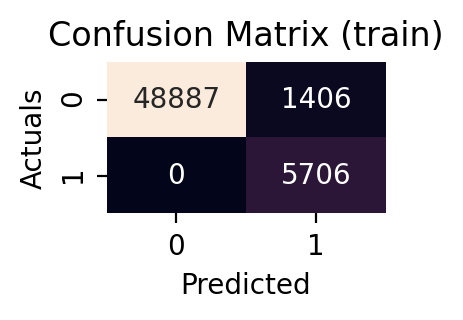

In [92]:
# determining the confusion matrix for train set
plt.figure(figsize=(1.8,1),dpi=200)
plt.title('Confusion Matrix (train)')
confusion_train=confusion_matrix(y_train,y_train_pred)
sns.heatmap(confusion_train, annot=True, cbar=False, fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

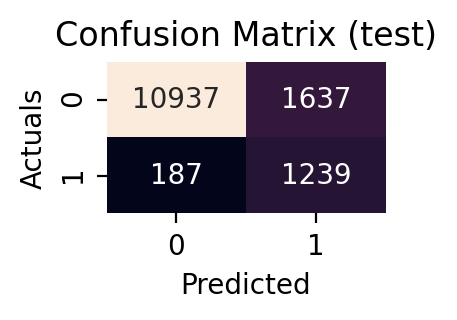

In [93]:
# determining the confusion matrix for test set
plt.figure(figsize=(1.8,1),dpi=200)
plt.title('Confusion Matrix (test)')
confusion_test=confusion_matrix(y_test,y_test_pred)
sns.heatmap(confusion_test, annot=True, cbar=False, fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

In [94]:
# TN: True Negative
TN_train=confusion_train[0,0]

# FP: False Positive
FP_train=confusion_train[0,1]

# FN: False Negative
FN_train=confusion_train[1,0]

# TP: True Positive
TP_train=confusion_train[1,1]

# TN: True Negative
TN_test=confusion_test[0,0]

# FP: False Positive
FP_test=confusion_test[0,1]

# FN: False Negative
FN_test=confusion_test[1,0]

# TP: True Positive
TP_test=confusion_test[1,1]

We're going to check some of the most important performance metrics such as <font color='green'><b>accuracy</b></font>, <font color='green'><b>sensitivity</b></font>, <font color='green'><b>specificity</b></font>, <font color='green'><b>precision</b></font> and <font color='green'><b>recall</b></font> for both the <b>train</b> and <b>test</b> set.

In [95]:
# checking the metrics for the train set
accuracy_train=accuracy_score(y_train,y_train_pred)
sensitivity_train=TP_train/(TP_train+FN_train) 
specificity_train=TN_train/(TN_train+FP_train)
precision_train=precision_score(y_train,y_train_pred)
recall_train=recall_score(y_train,y_train_pred) # by definition recall=sensitivity

# checking the metrics for the test set
accuracy_test=accuracy_score(y_test,y_test_pred)
sensitivity_test=TP_test/(TP_test+FN_test) 
specificity_test=TN_test/(TN_test+FP_test)
precision_test=precision_score(y_test,y_test_pred)
recall_test=recall_score(y_test,y_test_pred) # by definition recall=sensitivity

# representing all the above metrics in a dataframe
metrics=pd.DataFrame()
metrics['metrics']=['Accuracy','Sensitivity','Specificity','Precision','Recall']
metrics['train %']=np.round(100*np.array([accuracy_train,sensitivity_train,specificity_train,precision_train,recall_train]),2)
metrics['test %']=np.round(100*np.array([accuracy_test,sensitivity_test,specificity_test,precision_test,recall_test]),2)

metrics.set_index('metrics')

train %  test %
metrics                     
Accuracy       97.49   86.97
Sensitivity   100.00   86.89
Specificity    97.20   86.98
Precision      80.23   43.08
Recall        100.00   86.89

Here we can clearly see that there is a significant dip in the <b>accuracy_score</b> between <b>training</b> and <b>testing</b> set of the <b>random forest</b> model, it is due to the fact the we adjusted the probability <b>threshold</b> value to optimize for <b>sensitivity</b>

# <font color='navy'>Making Predictions Using The Unseen Test Set</font>

In [105]:
# reading the data csv and converting it into a dataframe
unseen_df=pd.read_csv('test.csv')

# quick peek into the dataframe
unseen_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

We have to subject the above <b>unseen_df</b> to all the <b>exact same transformations</b> which we have subjected the <b>train set</b> to and only then we make predictions off of this dataset

In [106]:
# dropping the id column
test_df=unseen_df.drop('id', axis=1)

In [107]:
# dropping the columns with majority NaNs
test_df.drop(dropping_columns, axis=1, inplace=True)

In [108]:
# dropping the columns with no variance
test_df.drop(drop_cols_no_var, axis=1, inplace=True)

In [109]:
# deleting the datetype columns with no variance
test_df.drop(cols_to_be_deleted, axis=1, inplace=True)

In [110]:
# converting object type to datetype
for cols in cols_to_be_converted:
    test_df[cols]=pd.to_datetime(test_df[cols], format="%m/%d/%Y")

In [111]:
# extracting only the day number out of it
test_df[cols_to_be_converted]=test_df[cols_to_be_converted].apply(lambda x: x.dt.day)
test_df[cols_to_be_converted].head()

date_of_last_rech_8  date_of_last_rech_7  date_of_last_rech_6
0                 24.0                 26.0                 21.0
1                 24.0                 16.0                 19.0
2                 28.0                 27.0                 29.0
3                 24.0                 30.0                 25.0
4                 30.0                 29.0                 29.0

In [112]:
test_df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   91.882   65.330   64.445        31.78        20.23        23.11   
1  414.168  515.568  360.868        75.51        41.21        19.84   
2  329.844  434.884  746.239         7.54         7.86         8.40   
3   43.550  171.390   24.400         5.31         2.16         0.00   
4  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_6  \
0         60.16         32.16         34.83           0.00  ...             0   
1        474.34        621.84        394.94           0.00  ...             0   
2         16.98         45.81         45.04          22.81  ...             0   
3         40.04        205.01         24.01           0.00  ...             0   
4         60.94         23.84         74.16           0.00  ...             0   

   monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  \
0             0             0            0            0            0  1692   
1             0             0            0            0            0  2533   
2             0             0            0            0            0   277   
3             0             0            0            0            0  1244   
4             0             0            0            0            0   462   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00  
2      525.61      758.41      241.84  
3        0.00        0.00        0.00  
4        0.00        0.00        0.00  

[5 rows x 127 columns]

In [119]:
test_predictions=grid.predict(test_df)
test_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [122]:
test_probabilities=grid.predict_proba(test_df)
test_probabilities

array([[0.92375, 0.07625],
       [0.96625, 0.03375],
       [0.1925 , 0.8075 ],
       ...,
       [0.8175 , 0.1825 ],
       [0.875  , 0.125  ],
       [0.72375, 0.27625]])

In [142]:
# making the final predictions
test_predictions=np.array([1 if num>0.62626262 else 0 for num in test_probabilities[:,1]])
test_predictions

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
# creating a dataframe to view the above predictions
submissions=pd.DataFrame()
submissions['id']=unseen_df.id
submissions['churn_probability']=test_predictions
submissions.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [139]:
# creating the csv file for kaggle competition
submissions.to_csv('amar_fazil_submission.csv')

# <font color='Navy' size=8>Logistic Regression Model</font>

<b>Logistic Regression</b> algorithm is <font color='darkviolet'><b>scale variant</b></font>, so we have to scale the data and here we prefer <font color='darkviolet'><b>StandardScaler</b></font>. <b>Logistic Regression</b> is suffers the '<font color='darkviolet'><b>curse of dimensionality</b></font>', so we might want to use dimensionality reduction technique such as <b>principal component analysis</b>. Though <b>principal component analysis</b> is usually a smarter way to reduce the dimensionality, it will create new features which are <b>NOT</b> business interpretable. Here the whole point of building a <b>Logistic Regression</b> algorithm is have a model which explains all the important features and <b>PCA</b> defeats that purpose.

Lets create the <b>pipeline</b> now, using the <b>imputer</b> object, the <b>learning algorithm</b> and the <b>SMOTE</b> object to balance the dataset and passing it on to the <b>gridsearch</b> object as the estimator

In [144]:
# importing scaling object
from sklearn.preprocessing import StandardScaler

# importing logistic regression object
from sklearn.linear_model import LogisticRegression

In [147]:
# instantiating imputer object
simple_reg=SimpleImputer()

# instantiating scaling object
scale_reg=StandardScaler()

# instantiating SMOTE object
smote_reg=SMOTE(n_jobs=-1)

# instantiating logistic regression object
log_reg=LogisticRegression(n_jobs=-1)

# instantiating stratified kfold cv object
stratify_reg=StratifiedKFold(n_splits=5)

# instantiating pipeline object
pipe_reg=Pipeline(steps=[('simple_reg',simple_reg),('scale_reg',scale_reg),('smote_reg',smote_reg),('log_reg',log_reg)])

In [222]:
# creating a parameter grid
param_grid_reg={'log_reg__C':np.logspace(6,6.4,20)}

# instantiating gridsearchcv object
grid_reg=GridSearchCV(estimator=pipe_reg,
                  param_grid=param_grid_reg,
                  cv=stratify_reg,
                  scoring='accuracy',
                  n_jobs=-1)

In [223]:
# training the algorithm on the data
grid_reg.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('simple_reg', SimpleImputer()),
                                       ('scale_reg', StandardScaler()),
                                       ('smote_reg', SMOTE(n_jobs=-1)),
                                       ('log_reg',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'log_reg__C': array([1000000.        , 1049669.62903088, 1101806.33010982,
       1156532.64179025, 1213977.18907008, 1274274.98570313,
       1337567.75152634, 1404004.24554832, 1473740.61558248,
       1546940.7652462 , 1623776.73918872, 1704429.12745319,
       1789087.48992322, 1877950.80185149, 1971227.9215177 ,
       2069138.08111479, 2171911.40201743, 2279789.43564357,
       2393025.7311805 , 2511886.43150958])},
             scoring='accuracy')

In [230]:
# best estimator parameter
grid_reg.best_params_

{'log_reg__C': 1623776.7391887242}

The above is the best estimator as per our <b>GridSearchCV</b> which is <font color='darkviolet'><b>LogisticRegression</b></font> model with the above specific parameter values

In [231]:
# best accuracy score
grid_reg.best_score_

0.8580867488168586

In [232]:
# predicted values
y_pred_reg=grid_reg.predict(X_test)
y_pred_reg

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [233]:
# this gives the probabilities of data points belonging to 'churn' class
y_test_prob_reg=grid_reg.predict_proba(X_test)[:,1]
y_test_prob_reg

array([0.50981259, 0.66331518, 0.1671926 , ..., 0.01581256, 0.20138621,
       0.03461946])

In [234]:
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     12574
           1       0.40      0.82      0.53      1426

    accuracy                           0.85     14000
   macro avg       0.69      0.84      0.72     14000
weighted avg       0.92      0.85      0.87     14000



Lets adjust the <b>probability threshold</b> to optimize for <b>recall_score</b>

In [235]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob_reg,drop_intermediate=False)
auc=round(100*roc_auc_score(y_test,y_test_prob_reg),2)
print(f'AUC={auc}')

AUC=90.73


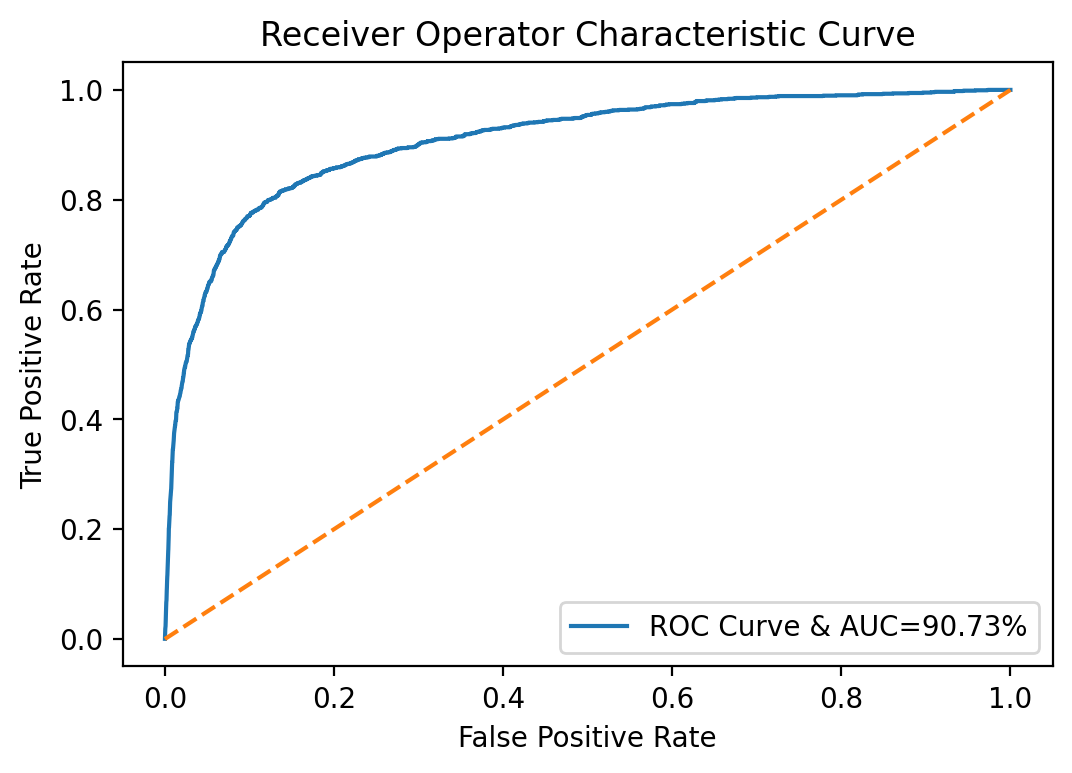

In [237]:
plt.figure(dpi=200)
plt.title('Receiver Operator Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.lineplot(x=fpr,y=tpr, label='ROC Curve & AUC=90.73%')
sns.lineplot(np.linspace(0,1,100),np.linspace(0,1,100), ls='--');

We know that farther the <font color='green'><b>ROC curve</b></font> is from the <b>line y=x</b> the better our model is. In that sense, we have a really good model and the <font color='green'><b>auc_score</b></font> is <b>90.73%</b> which is pretty good.

Let us now plot the graph of <font color='green'><b>accuracy vs threshold</b></font>, <font color='green'><b>sensitivity vs threshold</b></font> and <font color='green'><b>specificity vs threshold</b></font> on the same graph. Let us come up with a short and evenly spaced new array of <font color='green'><b>threshold values</b></font> and compute the above 3 metrics off of them.

In [240]:
# determine the threshold value for which sensitivity=specificity
thresholds[abs(tpr-(1-fpr))<0.00005]

array([0.46034895])

In [242]:
# creating 100 probability thresholds using linspace
threshold_list=np.linspace(0,1,100)
# creating lists to contain accuracy, sensitivity and specificity
accuracy_list=[]
sensitivity_list=[]
specificity_list=[]
for i in threshold_list:
    # making predictions for every choice of threshold
    y_tmp=np.array([1 if num>i else 0 for num in y_test_prob_reg])
    # getting the confusion matrix for the above prediction
    conf=confusion_matrix(y_test,y_tmp)
    # finding the other 3 metrics using the confusion matrix
    accuracy_list.append((conf[1,1]+conf[0,0])/(conf[0,0]+conf[0,1]+conf[1,1]+conf[1,0]))
    sensitivity_list.append(conf[1,1]/(conf[1,1]+conf[1,0]))
    specificity_list.append(conf[0,0]/(conf[0,0]+conf[0,1]))

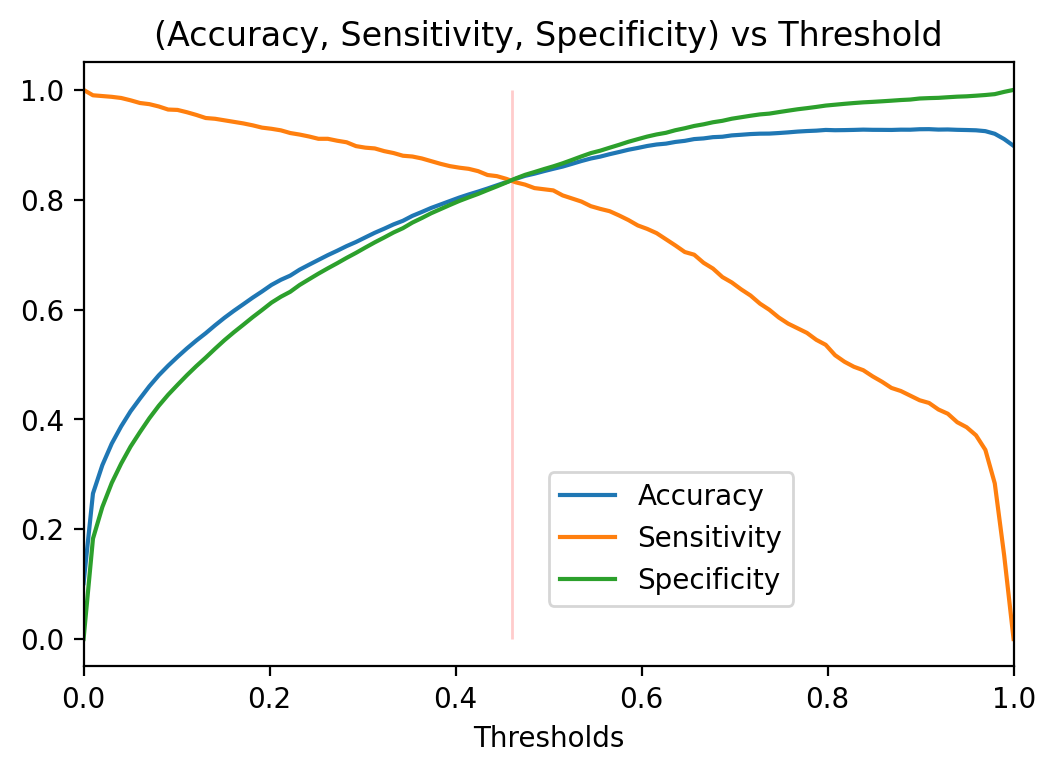

In [246]:
# plotting the curves using the metrics we've computed
plt.figure(dpi=200)
plt.title('(Accuracy, Sensitivity, Specificity) vs Threshold')
plt.xlabel('Thresholds')
plt.xlim((0,1))
sns.lineplot(x=threshold_list,y=accuracy_list, label='Accuracy')
sns.lineplot(x=threshold_list,y=sensitivity_list, label='Sensitivity')
sns.lineplot(x=threshold_list,y=specificity_list, label='Specificity')
sns.lineplot(x=0.46034895,y=[0,1], color='Red')
plt.legend(loc=(0.5,0.1));

From the above graph we can see that when we set the <font color='green'><b>probability threshold</b></font> as <b>0.46034895</b>. We are able to simultaneously optimize for all 3 important metrics of <font color='green'><b>accuracy</b></font>, <font color='green'><b>sensitivity</b></font> and <font color='green'><b>specificity</b></font>

In [244]:
# this gives the probabilities of data points belonging to 'churn' class
y_train_prob_reg=grid_reg.predict_proba(X_train)[:,1]
y_train_prob_reg

array([6.31790108e-02, 9.63593183e-01, 2.76933978e-01, ...,
       7.35314485e-04, 3.09328767e-01, 3.70934723e-03])

In [245]:
# making classification using 0.46034895 as threshold
y_train_pred_reg=np.array([1 if prob>0.46034895 else 0 for prob in y_train_prob_reg])
y_test_pred_reg=np.array([1 if prob>0.46034895 else 0 for prob in y_test_prob_reg])

# <font color='navy'>Classification Performance Metrics</font>
Though we've already computed all the important metrics such as <font color='green'><b>accuracy</b></font>, <font color='green'><b>sensitivity</b></font>, <font color='green'><b>specificity</b></font>, <font color='green'><b>precision</b></font> and <font color='green'><b>recall</b></font> etc. We've computed them based on an arbitrarily chosen <b>probability threshold</b> value of <b>0.5</b>. Later on using <font color='green'><b>ROC curve</b></font> and other <font color='green'><b>metric curves</b></font>, we've decided to choose <b>probability threshold</b> of <b>0.46034895</b> to optimize and find a balance between various metrics. Now we need to re-compute all the above metrics for both <b>train set</b> and <b>test set</b> using the new value <b>0.46034895</b> to figure out if our model is generalizing well.

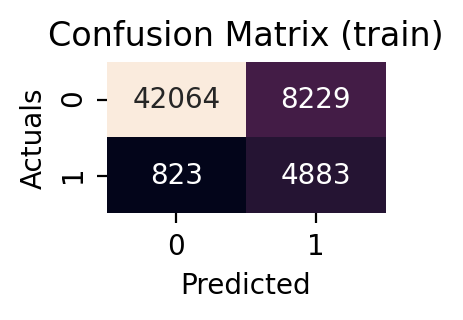

In [247]:
# determining the confusion matrix for train set
plt.figure(figsize=(1.8,1),dpi=200)
plt.title('Confusion Matrix (train)')
confusion_train=confusion_matrix(y_train,y_train_pred_reg)
sns.heatmap(confusion_train, annot=True, cbar=False, fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

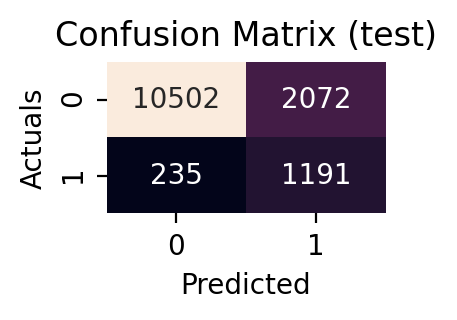

In [248]:
# determining the confusion matrix for test set
plt.figure(figsize=(1.8,1),dpi=200)
plt.title('Confusion Matrix (test)')
confusion_test=confusion_matrix(y_test,y_test_pred_reg)
sns.heatmap(confusion_test, annot=True, cbar=False, fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

In [249]:
# TN: True Negative
TN_train=confusion_train[0,0]

# FP: False Positive
FP_train=confusion_train[0,1]

# FN: False Negative
FN_train=confusion_train[1,0]

# TP: True Positive
TP_train=confusion_train[1,1]

# TN: True Negative
TN_test=confusion_test[0,0]

# FP: False Positive
FP_test=confusion_test[0,1]

# FN: False Negative
FN_test=confusion_test[1,0]

# TP: True Positive
TP_test=confusion_test[1,1]

We're going to check some of the most important performance metrics such as <font color='green'><b>accuracy</b></font>, <font color='green'><b>sensitivity</b></font>, <font color='green'><b>specificity</b></font>, <font color='green'><b>precision</b></font> and <font color='green'><b>recall</b></font> for both the <b>train</b> and <b>test</b> set.

In [250]:
# checking the metrics for the train set
accuracy_train=accuracy_score(y_train,y_train_pred_reg)
sensitivity_train=TP_train/(TP_train+FN_train) 
specificity_train=TN_train/(TN_train+FP_train)
precision_train=precision_score(y_train,y_train_pred_reg)
recall_train=recall_score(y_train,y_train_pred_reg) # by definition recall=sensitivity

In [251]:
# checking the metrics for the test set
accuracy_test=accuracy_score(y_test,y_test_pred_reg)
sensitivity_test=TP_test/(TP_test+FN_test) 
specificity_test=TN_test/(TN_test+FP_test)
precision_test=precision_score(y_test,y_test_pred_reg)
recall_test=recall_score(y_test,y_test_pred_reg) # by definition recall=sensitivity

In [252]:
# representing all the above metrics in a dataframe
metrics=pd.DataFrame()
metrics['metrics']=['Accuracy','Sensitivity','Specificity','Precision','Recall']
metrics['train %']=np.round(100*np.array([accuracy_train,sensitivity_train,specificity_train,precision_train,recall_train]),2)
metrics['test %']=np.round(100*np.array([accuracy_test,sensitivity_test,specificity_test,precision_test,recall_test]),2)

metrics.set_index('metrics')

train %  test %
metrics                     
Accuracy       83.84   83.52
Sensitivity    85.58   83.52
Specificity    83.64   83.52
Precision      37.24   36.50
Recall         85.58   83.52

Here we can clearly see that there is only a slight dip in the <b>accuracy_score</b> between <b>training</b> and <b>testing</b> set of the <b>Logistic Regression</b> model, it means that our model is generalizing well to the unseen data

# <font color='navy'>Making Predictions Using The Unseen Test Set</font>

In [253]:
test_predictions_reg=grid_reg.predict(test_df)
test_predictions_reg

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [264]:
test_probabilities_reg=grid_reg.predict_proba(test_df)
test_probabilities_reg

array([[0.95715097, 0.04284903],
       [0.92926875, 0.07073125],
       [0.14391507, 0.85608493],
       ...,
       [0.56938141, 0.43061859],
       [0.24114237, 0.75885763],
       [0.90958983, 0.09041017]])

In [265]:
# creating a dataframe to view the above predictions
submissions_reg=pd.DataFrame()
submissions_reg['id']=unseen_df.id
submissions_reg['churn_probability']=test_predictions_reg
submissions_reg.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [267]:
# creating the csv file for kaggle competition
submissions_reg.to_csv('amar_fazil_submission_reg.csv')

# <font color='navy'>Coefficients of Variables & Odds-Ratio:</font>

In [282]:
final_logistic=LogisticRegression(C=list(grid_reg.best_params_.values())[0])

In [287]:
# imputing the missing values
simple_imp=SimpleImputer()
X_imp=pd.DataFrame(simple_imp.fit_transform(X), columns=X.columns)
X_imp.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_6  \
0         32.24         96.68          2.33           0.00  ...           0.0   
1          0.00         25.99         30.89           0.00  ...           0.0   
2         53.99         82.05          0.00           0.00  ...           0.0   
3         68.76         78.48         50.23           0.00  ...           0.0   
4         56.99         38.11          9.63          53.64  ...           0.0   

   monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8     aon  \
0           0.0           0.0          0.0          0.0          0.0  1958.0   
1           1.0           0.0          0.0          0.0          0.0   710.0   
2           0.0           0.0          0.0          0.0          0.0   882.0   
3           0.0           0.0          0.0          0.0          0.0   982.0   
4           0.0           0.0          0.0          1.0          0.0   647.0   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         0.0  
4         0.0         0.0         0.0  

[5 rows x 127 columns]

In [291]:
# applying standard scaler
std_scale=StandardScaler()
X_std=pd.DataFrame(std_scale.fit_transform(X_imp), columns=X.columns)
X_std.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.753587 -0.555159 -0.771000    -0.287693    -0.031170    -0.433852   
1 -0.847171 -0.451263 -0.670336    -0.452948    -0.438650    -0.438102   
2 -0.665232 -0.508211 -0.792389    -0.451145    -0.386462    -0.438102   
3 -0.379318 -0.211770 -0.476708    -0.428252    -0.386200    -0.438102   
4 -0.126945 -0.435570 -0.503788    -0.380560    -0.422826    -0.417907   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_6  \
0     -0.536685     -0.317723     -0.615773      -0.173675  ...     -0.211242   
1     -0.640522     -0.541263     -0.525221      -0.173675  ...     -0.211242   
2     -0.466634     -0.363986     -0.623160      -0.173675  ...     -0.211242   
3     -0.419064     -0.375276     -0.463901      -0.173675  ...     -0.211242   
4     -0.456972     -0.502936     -0.592627       0.780295  ...     -0.211242   

   monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0     -0.202851     -0.214653     -0.13149    -0.128351     -0.12571   
1      2.406846     -0.214653     -0.13149    -0.128351     -0.12571   
2     -0.202851     -0.214653     -0.13149    -0.128351     -0.12571   
3     -0.202851     -0.214653     -0.13149    -0.128351     -0.12571   
4     -0.202851     -0.214653     -0.13149     1.447588     -0.12571   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0  0.774197   -0.252885   -0.246124   -0.233557  
1 -0.536150   -0.252885   -0.246124   -0.233557  
2 -0.355557   -0.252885   -0.246124   -0.233557  
3 -0.250562   -0.252885   -0.246124   -0.233557  
4 -0.602297   -0.252885   -0.246124   -0.233557  

[5 rows x 127 columns]

In [292]:
# oversampling using SMOTE
smte=SMOTE(n_jobs=-1)
X_final,y=smte.fit_resample(X_std,y)

In [293]:
# training the final logistic model
final_logistic.fit(X_final,y)

LogisticRegression(C=1623776.7391887242)

In [294]:
# making predictions of X
y_pred_final=final_logistic.predict(X_final)
y_pred_final

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [298]:
stats=pd.DataFrame()
stats['features']=['const']+list(X.columns)
stats['coeff']=[final_logistic.intercept_[0]]+list(final_logistic.coef_[0])
stats['odds_ratio']=np.exp(np.array(stats['coeff']))
stats.sort_values(by='odds_ratio', ascending=False)

features     coeff  odds_ratio
36  std_og_t2m_mou_8  1.204889    3.336387
6        onnet_mou_8  1.026143    2.790282
42      std_og_mou_8  0.968902    2.635049
87      isd_ic_mou_8  0.957672    2.605622
66      loc_ic_mou_8  0.685385    1.984536
..               ...       ...         ...
84      spl_ic_mou_8 -0.948771    0.387217
51       og_others_8 -1.095035    0.334528
0              const -1.986207    0.137215
54    total_og_mou_8 -3.808879    0.022173
81    total_ic_mou_8 -4.183836    0.015240

[128 rows x 3 columns]

From the above table, we can see that <font color='green'><b>std_og_t2m_mou_8</b></font> has the greatest positive influence on churn which means that higher the <font color='green'><b>std_og_t2m_mou_8</b></font> higher the odds of churn and <font color='green'><b>onnet_mou_8</b></font> has the second highest positive influence on churn. Likewise <font color='green'><b>total_ic_mou_8</b></font> has the greatest negative influence on churn which means that higher the <font color='green'><b>total_ic_mou_8</b></font> lower the odds of churn and <font color='green'><b>total_og_mou_8</b></font> has the second highest negative influence on churn